In [1]:
!kaggle competitions download -c dogs-vs-cats

'kaggle'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From (original): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
From (redirected): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd&confirm=t&uuid=6f328893-fec5-4da5-8a43-aca5f5d04986
To: c:\education\python_dev\deeplearing\dogs-vs-cats.zip
100%|██████████| 852M/852M [00:46<00:00, 18.4MB/s] 


'dogs-vs-cats.zip'

In [4]:
!unzip -qq c:\education\python_dev\deeplearing\dogs-vs-cats.zip

In [6]:
!unzip -qq c:\education\python_dev\deeplearing\train.zip

In [8]:
!unzip -qq c:\education\python_dev\deeplearing\test1.zip

In [7]:
import os, shutil, pathlib


original_dir = pathlib.Path("../train/")
new_base_dir = pathlib.Path("../cats_vs_dogs_small")


def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)


make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# 3은 칼라
# 레이블은 강아지이미지에 답이다. 특정디텍토리
# vgg

In [14]:
model.summary()
# max_pooling으로 압축시킴
# 256개가 웨이틀가 됨입력값을 재표현한거임ㅠ

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [16]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [15]:
import os, shutil, pathlib
new_base_dir = pathlib.Path("../cats_vs_dogs_small")

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)
#  0~255를 이미지가 이건을 압축을 풀고 해라부동소수점타입의 텐서로 변화
# 인덱싱단일 이미지 추출 
# numpy수동인사람이
# 맵은 callable은 함수 스스로가 이터러블하다.

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [18]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [19]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(#best model save
        filepath="convnet_from_scratch.h5", #고성능 파일포맷 
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(# 데이터 셋오브젝트
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 27s 409ms/step - loss: 0.7042 - accuracy: 0.5070 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/30


c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 26s 407ms/step - loss: 0.6944 - accuracy: 0.5445 - val_loss: 0.6909 - val_accuracy: 0.5120
Epoch 3/30
63/63 [==============================] - 26s 409ms/step - loss: 0.6949 - accuracy: 0.5710 - val_loss: 0.6843 - val_accuracy: 0.5200
Epoch 4/30
63/63 [==============================] - 26s 407ms/step - loss: 0.6708 - accuracy: 0.6035 - val_loss: 0.6366 - val_accuracy: 0.6400
Epoch 5/30
63/63 [==============================] - 26s 409ms/step - loss: 0.6444 - accuracy: 0.6390 - val_loss: 0.6480 - val_accuracy: 0.6010
Epoch 6/30
63/63 [==============================] - 27s 421ms/step - loss: 0.6243 - accuracy: 0.6625 - val_loss: 0.6260 - val_accuracy: 0.6280
Epoch 7/30
63/63 [==============================] - 28s 438ms/step - loss: 0.5822 - accuracy: 0.6940 - val_loss: 0.5902 - val_accuracy: 0.6810
Epoch 8/30
63/63 [==============================] - 30s 472ms/step - loss: 0.5539 - accuracy: 0.7175 - val_loss: 0.5814 - val_accuracy: 0.6820
Epoch 9/30

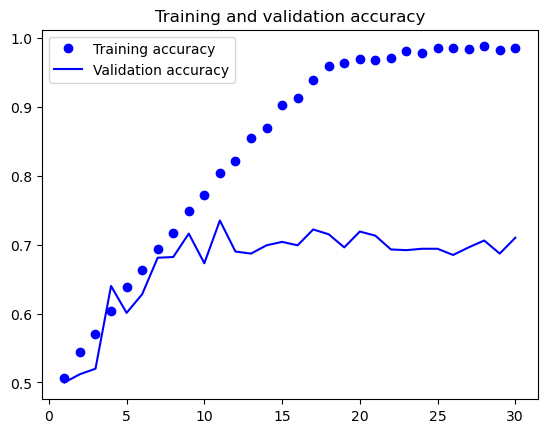

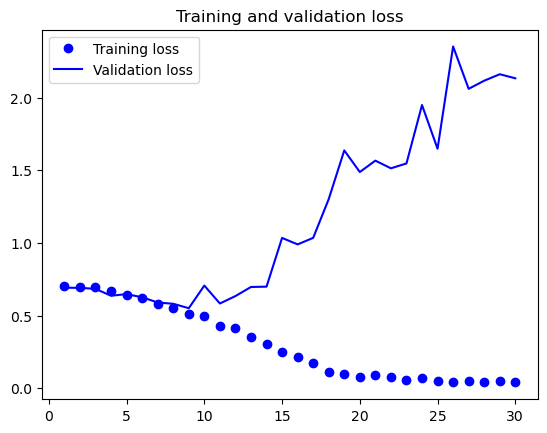

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# 이미지가 제일 적을때 계속 넣어서 문제수가 제일 적었음 외워버림 이ㅣ미지가 조금만 변해도 계속 모델의 
# 다양한방법으로 가장 중요한문제증식이 답이다.
# 이미지의 층은 오브젝트파일의 이미지를 전처리로 해서 생성된 

In [22]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [24]:
test_model = keras.models.load_model("convnet_from_scratch.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 6s 89ms/step - loss: 0.5660 - accuracy: 0.7265
테스트 정확도: 0.726


In [25]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


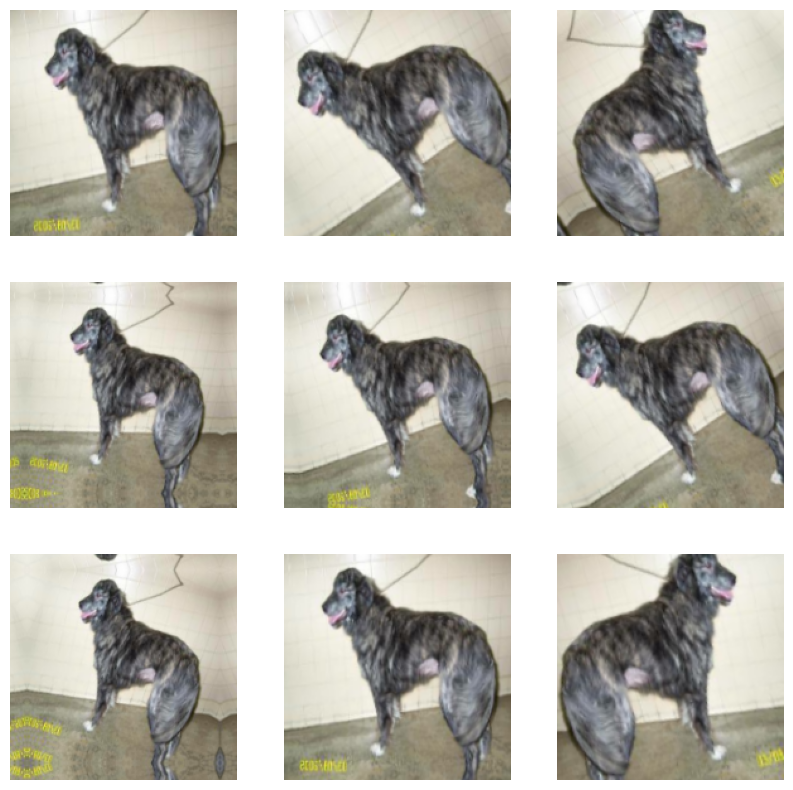

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 27s 402ms/step - loss: 0.6986 - accuracy: 0.5105 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/30


c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 27s 417ms/step - loss: 0.6856 - accuracy: 0.5635 - val_loss: 0.6819 - val_accuracy: 0.5780
Epoch 3/30
63/63 [==============================] - 27s 419ms/step - loss: 0.6798 - accuracy: 0.5930 - val_loss: 0.6597 - val_accuracy: 0.6230
Epoch 4/30
63/63 [==============================] - 27s 429ms/step - loss: 0.6539 - accuracy: 0.6230 - val_loss: 0.6470 - val_accuracy: 0.6280
Epoch 5/30
63/63 [==============================] - 29s 464ms/step - loss: 0.6365 - accuracy: 0.6485 - val_loss: 0.7448 - val_accuracy: 0.5890
Epoch 6/30
63/63 [==============================] - 29s 464ms/step - loss: 0.6136 - accuracy: 0.6655 - val_loss: 0.5896 - val_accuracy: 0.6750
Epoch 7/30
63/63 [==============================] - 30s 477ms/step - loss: 0.6182 - accuracy: 0.6730 - val_loss: 0.6130 - val_accuracy: 0.6320
Epoch 8/30
63/63 [==============================] - 29s 461ms/step - loss: 0.6590 - accuracy: 0.6840 - val_loss: 0.5731 - val_accuracy: 0.6990
Epoch 9/30

In [29]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 0.4703 - accuracy: 0.7685
테스트 정확도: 0.768


In [30]:
# 전이학습

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
# 기존포멧에 맞게 맞춰서 넣어야한다.
# 레이블하고 분리해서 인폿콤프넷을 

In [32]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images) # 
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 1s/step


In [33]:
train_features.shape


(2000, 5, 5, 512)

In [35]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 17.0910 - accuracy: 0.9260 - val_loss: 4.2880 - val_accuracy: 0.9630
Epoch 2/20
 7/63 [==>...........................] - ETA: 1s - loss: 0.9326 - accuracy: 0.9911

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 1s 20ms/step - loss: 4.5751 - accuracy: 0.9715 - val_loss: 5.3806 - val_accuracy: 0.9630
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 2.2923 - accuracy: 0.9880 - val_loss: 5.6212 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 1.5273 - accuracy: 0.9890 - val_loss: 7.5663 - val_accuracy: 0.9610
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.7770 - accuracy: 0.9940 - val_loss: 5.5784 - val_accuracy: 0.9680
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 1.0595 - accuracy: 0.9945 - val_loss: 6.5732 - val_accuracy: 0.9660
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9575 - accuracy: 0.9940 - val_loss: 4.6578 - val_accuracy: 0.9740
Epoch 8/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8582 - accuracy: 0.9970 - val_loss: 4.4519 - val_accuracy: 0.9720
Epoch 9/20
63/63 [======

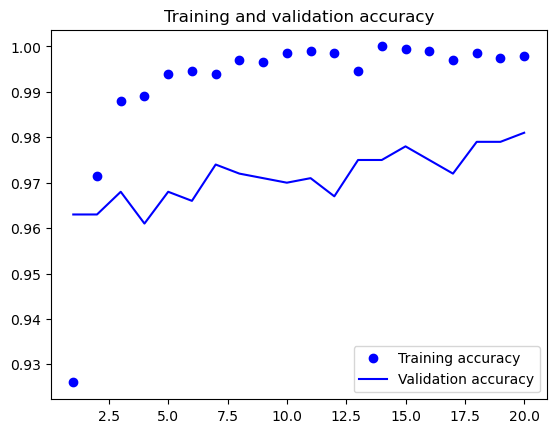

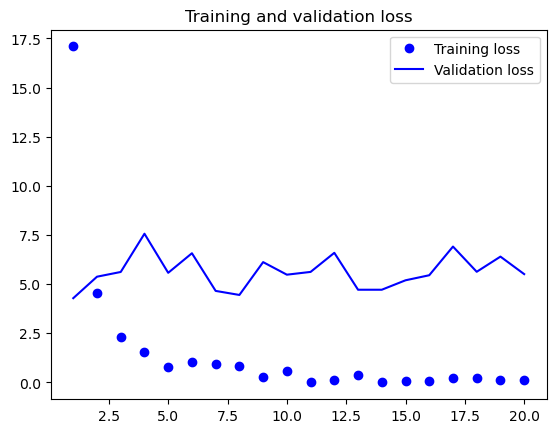

In [36]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [37]:
test_model = keras.models.load_model(
    "feature_extraction.h5")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 0s 5ms/step - loss: 4.4647 - accuracy: 0.9655
테스트 정확도: 0.965


In [38]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [39]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [40]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [41]:
# 이미지 증식
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)# 증식층 추가
x = conv_base(x) # 전이학습
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)# 모델만들고 컨파일
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs= 30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 192s 3s/step - loss: 7.1003 - accuracy: 0.9445 - val_loss: 3.1941 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 200s 3s/step - loss: 3.8456 - accuracy: 0.9610 - val_loss: 2.1923 - val_accuracy: 0.9790
Epoch 3/30
63/63 [==============================] - 198s 3s/step - loss: 4.4690 - accuracy: 0.9570 - val_loss: 4.0415 - val_accuracy: 0.9720
Epoch 4/30
63/63 [==============================] - 188s 3s/step - loss: 4.9947 - accuracy: 0.9605 - val_loss: 6.9352 - val_accuracy: 0.9590
Epoch 5/30
63/63 [==============================] - 199s 3s/step - loss: 4.1902 - accuracy: 0.9660 - val_loss: 7.1436 - val_accuracy: 0.9600
Epoch 6/30
63/63 [==============================] - 196s 3s/step - loss: 2.5318 - accuracy: 0.9740 - val_loss: 3.0492 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 188s 3s/step - loss: 2.8785 - accuracy: 0.9755 - val_loss: 2.4920 - val_accuracy: 0.9830
Epoch 8/30
63/63 [======

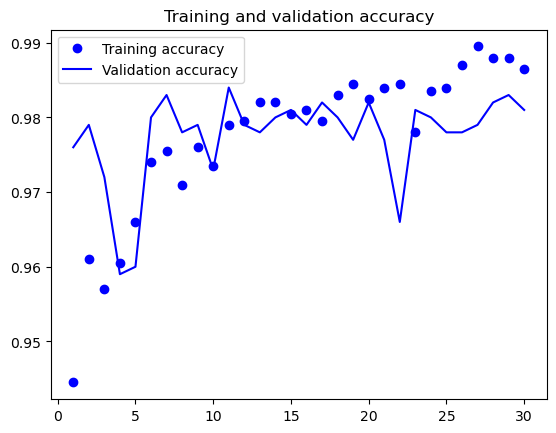

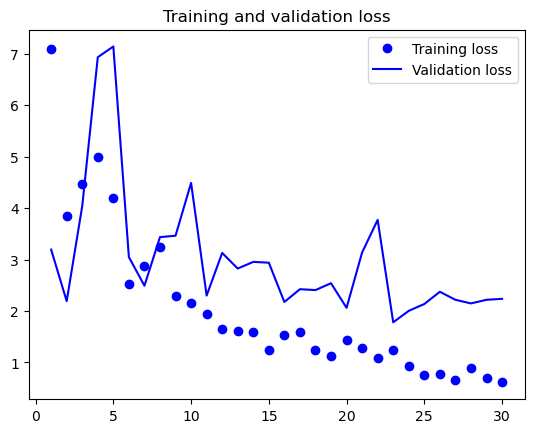

In [44]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [45]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 141s 2s/step - loss: 2.3193 - accuracy: 0.9790
테스트 정확도: 0.979


In [ ]:
# 딥러닝은 해봐야안다.
# 딥러닝과학자들이 
# .

In [46]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [47]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False
    # 마지막층은변경한다
    # 커.

In [48]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 214s 3s/step - loss: 0.7334 - accuracy: 0.9870 - val_loss: 2.0841 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - 200s 3s/step - loss: 0.6590 - accuracy: 0.9885 - val_loss: 1.9438 - val_accuracy: 0.9830
Epoch 3/30
63/63 [==============================] - 203s 3s/step - loss: 0.5248 - accuracy: 0.9865 - val_loss: 1.6212 - val_accuracy: 0.9810
Epoch 4/30
63/63 [==============================] - 200s 3s/step - loss: 0.3776 - accuracy: 0.9900 - val_loss: 1.6231 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 202s 3s/step - loss: 0.3399 - accuracy: 0.9900 - val_loss: 1.7055 - val_accuracy: 0.9820
Epoch 6/30
63/63 [==============================] - 420s 7s/step - loss: 0.2856 - accuracy: 0.9890 - val_loss: 1.3162 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 202s 3s/step - loss: 0.2939 - accuracy: 0.9890 - val_loss: 1.3490 - val_accuracy: 0.9820
Epoch 8/30
63

KeyboardInterrupt: 

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")